In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Update the paths accordingly
train_path = '/content/drive/MyDrive/Colab Notebooks/accident_dataset/data/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/accident_dataset/data/test'
val_path = '/content/drive/MyDrive/Colab Notebooks/accident_dataset/data/val'

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=101,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=101,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=101,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 184s 9s/step - loss: 0.9259 - accuracy: 0.5373 - val_loss: 0.5761 - val_accuracy: 0.7551
Epoch 2/50
8/8 [==============================] - 50s 6s/step - loss: 0.5181 - accuracy: 0.7535 - val_loss: 0.4270 - val_accuracy: 0.8163
Epoch 3/50
8/8 [==============================] - 67s 9s/step - loss: 0.3474 - accuracy: 0.8597 - val_loss: 0.3522 - val_accuracy: 0.8367
Epoch 4/50
8/8 [==============================] - 52s 7s/step - loss: 0.2045 - accuracy: 0.9330 - val_loss: 0.2228 - val_accuracy: 0.9082
Epoch 5/50
8/8 [==============================] - 52s 7s/step - loss: 0.1072 - accuracy: 0.9646 - val_loss: 0.1485 - val_accuracy: 0.9490
Epoch 6/50
8/8 [==============================] - 53s 7s/step - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.2393 - val_accuracy: 0.8980
Epoch 7/50
8/8 [==============================] - 56s 7s/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.2460 - val_accuracy: 0.8776
Epoch 8/50
8/8 [=================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          368672    
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                        

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/accident.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 6s 1s/step


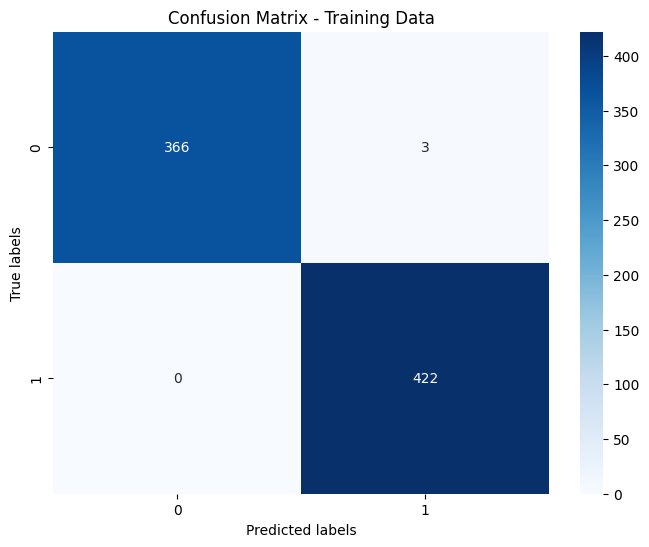

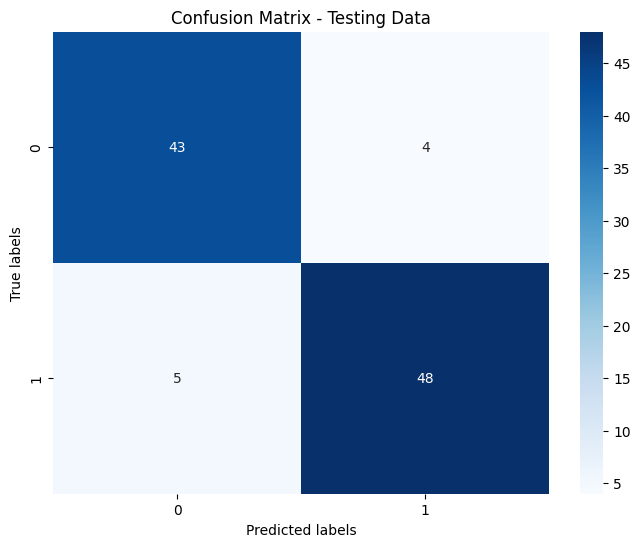

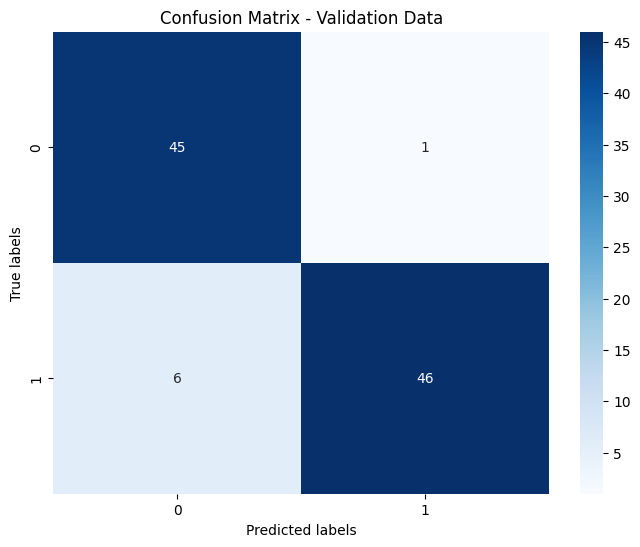

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Assuming you have loaded your model already
model = load_model('/content/drive/MyDrive/Colab Notebooks/accident.h5')

# Function to extract true labels and predicted labels
def get_true_pred_labels(model, dataset):
    true_labels = []
    predicted_labels = []
    for images, labels in dataset:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    return true_labels, predicted_labels

# Extract true labels and predicted labels for training, testing, and validation datasets
train_true_labels, train_predicted_labels = get_true_pred_labels(model, training_ds)
test_true_labels, test_predicted_labels = get_true_pred_labels(model, testing_ds)
val_true_labels, val_predicted_labels = get_true_pred_labels(model, validation_ds)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plot confusion matrices for training, testing, and validation datasets
plot_confusion_matrix(train_true_labels, train_predicted_labels, title='Confusion Matrix - Training Data')
plot_confusion_matrix(test_true_labels, test_predicted_labels, title='Confusion Matrix - Testing Data')
plot_confusion_matrix(val_true_labels, val_predicted_labels, title='Confusion Matrix - Validation Data')


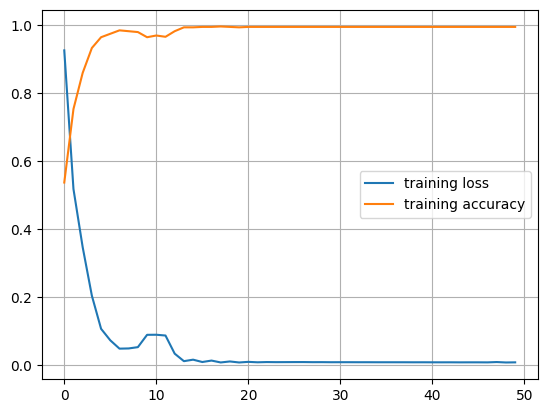

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

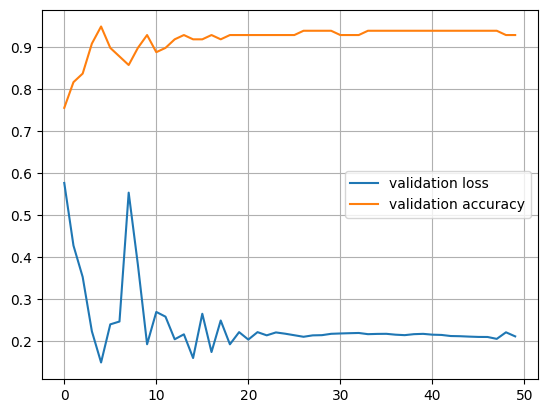

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
#positive event is accident negative event is non accident
for i in range(0,100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

In [ ]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 43
True negatives are: 48
False negatives are: 4
False positives are: 5


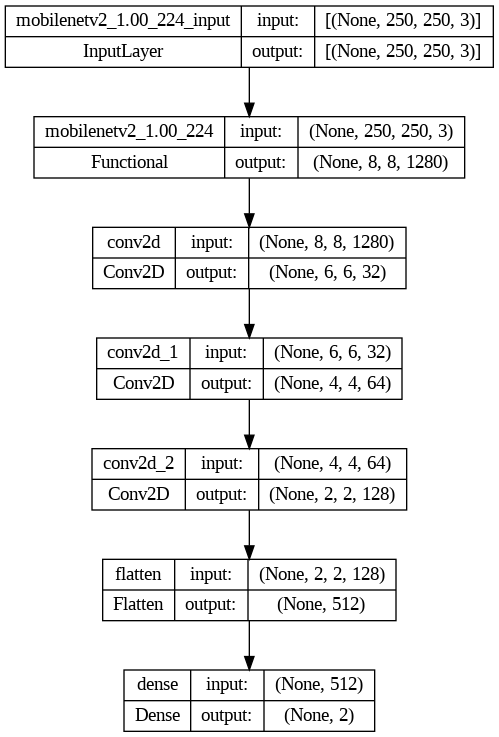

In [ ]:
import tensorflow as tf

# Assuming you already have your model defined
# model = ...

# Save the visualization of the model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
print(class_names)

['Accident', 'Non Accident']


In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
image=[]
label=[]

c=1
cap= cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/accident_video(online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 0s 60ms/step
60
1/1 [==============================] - 0s 58ms/step
90
1/1 [==============================] - 0s 61ms/step
120
1/1 [==============================] - 0s 60ms/step
150
1/1 [==============================] - 0s 76ms/step
180
1/1 [==============================] - 0s 64ms/step
210
1/1 [==============================] - 0s 61ms/step
240
1/1 [==============================] - 0s 62ms/step
270
1/1 [==============================] - 0s 66ms/step
300
1/1 [==============================] - 0s 62ms/step
330
1/1 [==============================] - 0s 86ms/step
360
1/1 [==============================] - 0s 59ms/step
390
1/1 [==============================] - 0s 59ms/step
420
1/1 [==============================] - 0s 63ms/step
450
1/1 [==============================] - 0s 60ms/step
480
1/1 [==============================] - 0s 58ms/step
510
1/1 [==============================] - 0s 73ms/step
540
1/1 [==============================] - 0s 67ms/

No Accident
AxesImage(size=(360, 640))


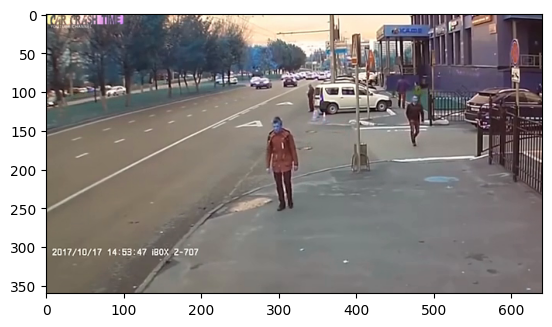

In [ ]:
print(label[22])
print(plt.imshow(image[22]))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Function to generate metrics report
def generate_metrics_report(true_labels, predicted_labels):
    report = classification_report(true_labels, predicted_labels, output_dict=True)
    return report

# Replace these with your actual true and predicted labels
true_labels = test_true_labels
predicted_labels = test_predicted_labels

# Get unique class labels
unique_labels = set(true_labels + predicted_labels)
target_names = [f'Class {label}' for label in unique_labels]

# Generate classification report
report = generate_metrics_report(true_labels, predicted_labels)

# Calculate micro-accuracy and macro-accuracy
micro_accuracy = accuracy_score(true_labels, predicted_labels)
macro_accuracy = report['accuracy']

# Print the report
print(classification_report(true_labels, predicted_labels, target_names=target_names))

# Print micro-accuracy and macro-accuracy
print(f'Micro-Accuracy: {micro_accuracy:.2f}')
print(f'Macro-Accuracy: {macro_accuracy:.2f}')


              precision    recall  f1-score   support

     Class 0       0.90      0.91      0.91        47
     Class 1       0.92      0.91      0.91        53

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Micro-Accuracy: 0.91
Macro-Accuracy: 0.91
